# 사이킷런 LinearRegression  클래스

### Scikit-Learn LinearRegression 클래스
> **class sklearn.linear_model.LinearRegression(fit_intercept = True, normalize = False, copy_X = True, n_jobs = 1)**

- LinearRegression 클래스는 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화하는 OLS(Ordinary Least Squares)추정 방식으로 구현한 클래스입니다.
- 입력 파라미터
    - fit_intercept 
        - boolean값으로 디폴트는 True입니다. 
        - Intercept(절편) 값을 계산할 것인지 마지 지정하며, False일 경우 intercept가 사용되지 않고 0으로 지정됩니다.
    - normalize 
        - boolean값으로 디폴트는 False입니다.
        - True일 경우 회귀 수행 전 입력 데이터 세트를 정규화합니다.

- 속성
    - coef_ : fit() 메서드를 수행했을 때 회귀 계수를 배열 형태로 저장하는 속성. Shape은 (Target값 개수, 피처 개수)
    - intercept_ : intercept값

### 선형 회귀의 다중 공선성 문제
- 다중 공선성이란?
    - 피쳐(변수)간의 상관관계가 매우 높은 걍우 **분산이 매우 커져서 오류에 민감**해지며, 이러한 현상을 다중공선성이라고 합니다.
    - 일반적으로 상관관계가 높은 피처가 많은 경우 **독립적인 중요한 피처만 남기고 제거**하거나 **규제를 적용**합니다.

### 회귀 평가 지표
- MAE(Mean Absolute Error)
    - 실제값과 예측값의 차이를 절댓값으로 변환해 평균한 것입니다.
    - 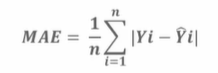

- MSE(Mean Squared Error)
    - 실제값과 예측값의 차이를 제곱해 평균한 것입니다.
    - 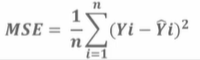

- MSLE(Mean Square Log Error)
    - MSE에 로그를 적용한 것입니다. 결정값이 클 수록 오류값도 커지기 때문에 일부 큰 오류값들로 인해 전체 오류값이 커지는 것을 막아줍니다.
    - 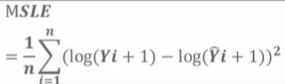

- RMSE(Root Mean Squared Error)
    - MSE값은 오류의 제곱을 구해 실제 오류 평균보다 더 커지는 특성이 있으므로 MSE에 루트를 씌운 것이 RMSE입니다.
    - 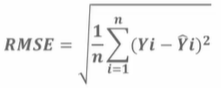

- RMSLE(Root Mean Squared Log Error)
    - RMSE에 **로그**를 적용한 것입니다. 결정값이 클수록 오류값도 커지기 때문에 일부 큰 오류값들로 인해 전체 오류값이 커지는 것을 막아줍니다.
    - 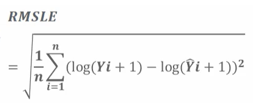
    
- $R^{2}$
    - 분산 기반으로 예측 성능을 평가합니다. 실제 값의 분산 대비 예측값의 분산 비율(예측값 분산/실제값 분산)을 지표로하며, 1에 가까울수록 예측 정확도가 높습니다.
    - 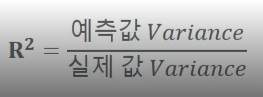

### MAE와 RMSE의 비교
- MAE에 비해 RMSE는 큰 오류값에 상대적인 패널티를 더 부여합니다.
- 예시
    - 다섯 개의 오류값(실제값과 예측값의 차이)이 10, 20, 10, 10, 100과 같이 다른 값에 비해 **큰 오류값이 존재하는 경우 RMSE는 전반적으로 MAE보다 높습니다.**
    - MAE = 30, RSME = 46.26
- 이처럼 상대적으로 더 큰 오류값이 있을 때 이에 대한 **더 큰 패널티를 부과**하는 평가 방식이 RMSE입니다.

### 사이킷런 회귀 평가 API
- 사이킷런 평가 지표 API
    - MAE : metrics.mean_absolute_error
    - MSE : metrics.mean_squared_error
    - RMSE : metrics.mean_squared_error를 그대로 사용하되 squared 파라미터를 False로 설정(np.sqrt(MSE) 사용을 권장함)
    - MSLE : metrics.mean_squared_log_error
    - $R^{2}$ : metrics.r1_score

- Scoring 함수 적용값(CV 혹은 GridSearchCV에서 평기시 scoring 파라미터 사용)
    - MAE : neg_mean_absolute_error
    - MSE : neg_mean_squared_error
    - RMSE : neg_root_mean_squared_error
    - MSLE : neg_mean_squared_log_error
    - $R^{2}$ : r2

### 사이킷런 Scoring 함수 회귀평가 적용시 유의사항
- 회귀 평가지표는 음수가 아닌 양수값입니다.
- **Scoring 함수에서 평가지표를 음수로 반환**하는 이유는 score값이 클수록 좋은 모델로 평가하기 때문입니다. 따라서 평가지표를 음수로 바꿔 **평가지표의 절댓값이 작은 값 일수록 좋은 모델로 평가**합니다.